# 모델 검증
- 모델 성능을 테스트 세트에 대하여 평가하기 전, 학습데이터의 일부를 검증 세트로 분리하여 검증 세트를 이용하여 모델 평가
- 학습 데이터에 과적합 되어 있는지 여부를 사전 검증
- 테스트 세트에 대하여 평가하기 전에 모델의 성능을
점검해 볼 수 있는 모의고사 같은 과정



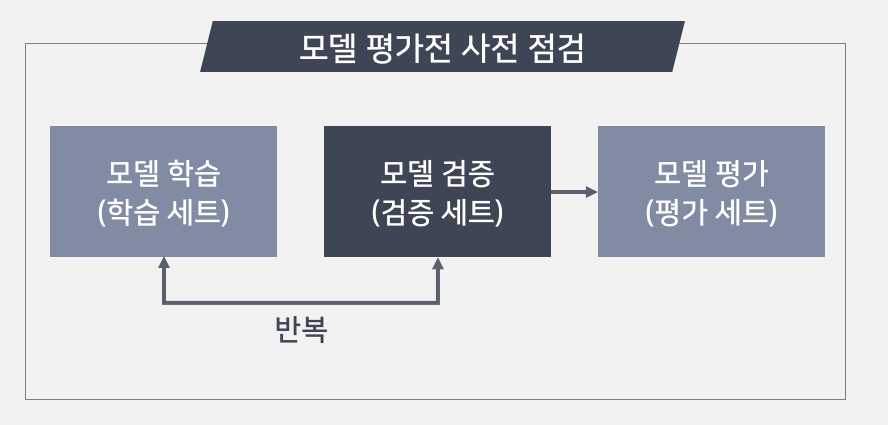

# 과대적합 과소적합
- 과대적합(Overfitting)
    - 머신러닝 모델을 학습할 때 학습 데이터에 지나치게 최적화하여 발생하는 문제
    - 학습 데이터에 대해서는 모델 성능이 높게 나타나고, 새로운 데이터에 대해서 정확한 예측을 수행하지 못함
- 과소적합(Underfitting)
    - 머신러닝 모델이 충분히 복잡하지 않아 학습 데이터의 패턴을 반영하지 못하는 문제







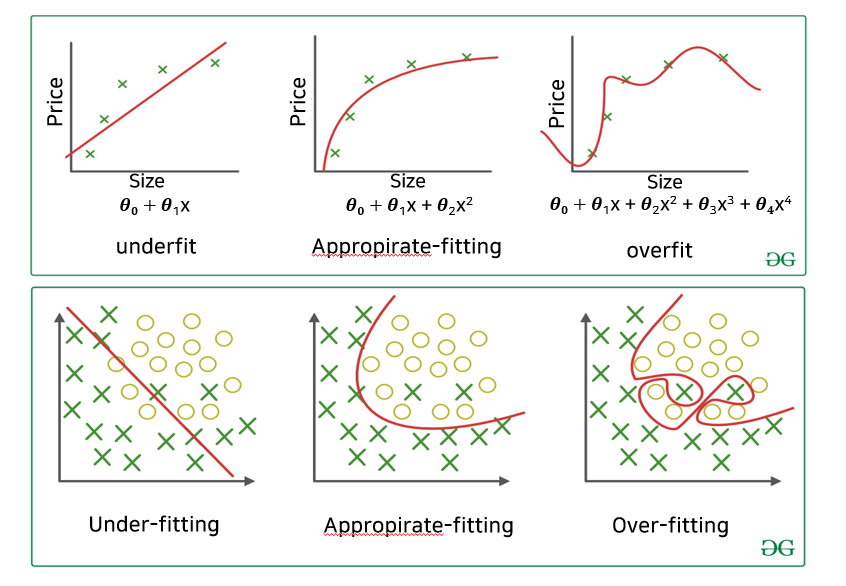

## 과적합 발생 원인
- 학습 데이터는 실제 데이터의 샘플이기 때문에 모집단이 가지고 있는 패턴들을 가지고 있거나 또는 일부 누락 할 수도 있음
- 학습 데이터에만 존재하는 패턴까지 학습하여 불필요 패턴까지 학습


## 과적합 해결이 어려운 이유
- 실제 데이터를 모두 수집하는 것은 불가능 함
- 실제 데이터를 모두 수집하더라도 모든 데이터를 학습시키는 것은 불가능 함
- 학습 데이터만으로는 실제 데이터와의 오차가 커지는 지점을 정확하게 알기 어려움


## 과적합을 피하고 일반화 가능성을 높이기 위한 방법
- 데이터의 양을 늘리기
    - 데이터의 양이 적을 경우 데이터의 특정 패턴이나 노이즈까지 쉽게 학습하게 되므로 과적합 현상이 발생할 확률이 늘어남
    - 데이터의 양을 늘릴 수록 데이터의 일반적인
패턴을 학습하여 과적합을 방지할 수 있음
- 모델의 복잡도
    - 성능과 비례하지 않기 때문에 모델의 복잡도를 줄임
- 가중치 규제
    - 모델의 파라미터가 커지는 것을 제어
- 모델 검증
    - 모델의 검증을 통해 과적합 여부를 사전 검증









# 고객 채무불이행 데이터셋
- 학습세트
    - https://drive.google.com/file/d/16ympvmN1s3uk8lv99aWuzDdQFO1XBLcQ/view?usp=sharing
- 평가세트
    - https://drive.google.com/file/d/1DEqTAmbdYEmaGb2IdZFIKNBd9Fx6bfZ8/view?usp=sharing

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
DATA_PATH = "data/"

# 데이터 불러오기

In [7]:
import numpy as np
import pandas as pd

train = pd.read_csv(f"{DATA_PATH}loan_default_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}loan_default_test.csv") # 테스트데이터
train.shape, test.shape

((19548, 10), (13033, 9))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19548 entries, 0 to 19547
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      19548 non-null  object 
 1   나이      19548 non-null  int64  
 2   연간소득    19548 non-null  int64  
 3   주택소유상태  19548 non-null  object 
 4   근로기간    18996 non-null  float64
 5   대출목적    19548 non-null  object 
 6   대출금액    19548 non-null  int64  
 7   이자율     17665 non-null  float64
 8   신용거래기간  19548 non-null  int64  
 9   target  19548 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.5+ MB


# 데이터 전처리
- 피처 추출, 데이터 정제, 범주형 피처 인코딩, 피처 스케일링

In [9]:
train.isnull().sum()

ID           0
나이           0
연간소득         0
주택소유상태       0
근로기간       552
대출목적         0
대출금액         0
이자율       1883
신용거래기간       0
target       0
dtype: int64

In [10]:
test.isnull().sum()

ID           0
나이           0
연간소득         0
주택소유상태       0
근로기간       343
대출목적         0
대출금액         0
이자율       1233
신용거래기간       0
dtype: int64

In [11]:
work_period_mean, interest_mean = train["근로기간"].mean(), train["이자율"].mean()

In [12]:
train["근로기간"] = train["근로기간"].fillna(work_period_mean)
train["이자율"] = train["이자율"].fillna(interest_mean)

In [13]:
test["근로기간"] = test["근로기간"].fillna(work_period_mean)
test["이자율"] = test["이자율"].fillna(interest_mean)

In [14]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(np.int64(0), np.int64(0))

## 피처로 사용할 변수 선택하기

In [15]:
train.head()

,ID,나이,연간소득,주택소유상태,근로기간,대출목적,대출금액,이자율,신용거래기간,target
0,train_0,39,170000,임대,9.0,부채통합,17000,12.99,14,0
1,train_1,22,60000,모기지론,6.0,교육,2800,10.99,4,0
2,train_2,23,48152,모기지론,7.0,의료,9500,7.29,2,0
3,train_3,25,62496,모기지론,1.0,주택개선,8000,7.51,2,0
4,train_4,22,41500,임대,6.0,개인사업,2500,15.62,2,0


In [16]:
train_ft = train.iloc[:,1:-1]
test_ft = test.iloc[:,1:]

train_ft.shape, test_ft.shape

((19548, 8), (13033, 8))

In [17]:
train_ft.head()

,나이,연간소득,주택소유상태,근로기간,대출목적,대출금액,이자율,신용거래기간
0,39,170000,임대,9.0,부채통합,17000,12.99,14
1,22,60000,모기지론,6.0,교육,2800,10.99,4
2,23,48152,모기지론,7.0,의료,9500,7.29,2
3,25,62496,모기지론,1.0,주택개선,8000,7.51,2
4,22,41500,임대,6.0,개인사업,2500,15.62,2


In [18]:
# 신용거래기간별 대출금액에 대한 평균, 표준편차, 왜도 값을 피처로 추가
agg_dict = {
    "대출금액": [
        ("신용거래기간_대출금액_mean", "mean"),
        ("신용거래기간_대출금액_std", "std"),
        ("신용거래기간_대출금액_skew", "skew")
    ]
}

tmp = train_ft.groupby("신용거래기간").agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp = tmp.reset_index()
tmp.head()

,신용거래기간,신용거래기간_대출금액_mean,신용거래기간_대출금액_std,신용거래기간_대출금액_skew
0,2,9321.861080,6068.651364,1.174265
1,3,9334.283708,6063.260176,1.219634
2,4,9150.455055,6009.650733,1.231131
3,5,9840.552065,6400.165035,1.165260
4,6,10178.914835,6781.883496,1.184546


In [19]:
train_ft = train_ft.merge(tmp, on="신용거래기간", how="left")

In [20]:
test_ft = test_ft.merge(tmp, on="신용거래기간", how="left")

## one-hot 인코딩하기

In [21]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(np.int64(0), np.int64(0))

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
cols = train_ft.select_dtypes("object").columns
cols

Index(['주택소유상태', '대출목적'], dtype='object')

In [24]:
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit(train_ft[cols])

OneHotEncoder(handle_unknown='ignore')

In [25]:
enc_cols = enc.get_feature_names_out()
enc_cols

array(['주택소유상태_기타', '주택소유상태_모기지론', '주택소유상태_소유', '주택소유상태_임대', '대출목적_개인사업',
       '대출목적_교육', '대출목적_부채통합', '대출목적_의료', '대출목적_주택개선', '대출목적_투자'],
      dtype=object)

In [26]:
train_ft[enc_cols] = enc.transform(train_ft[cols]).toarray()
test_ft[enc_cols] = enc.transform(test_ft[cols]).toarray()

In [27]:
train_ft.shape, test_ft.shape

((19548, 21), (13033, 21))

In [28]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

## min-max 스케일링

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_ft)

MinMaxScaler()

In [30]:
train_ft[train_ft.columns] = scaler.transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)

In [31]:
target = train["target"]

In [32]:
target.mean()

np.float64(0.21818088807039082)

# Holdout 방식 검증

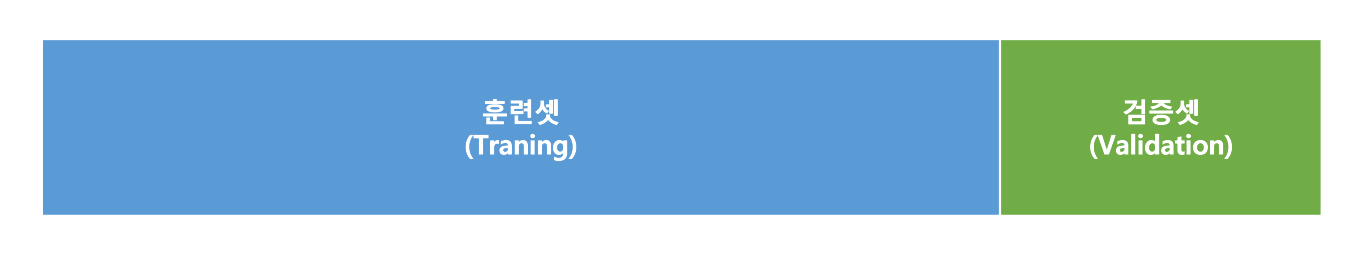

- 데이터를 2개의 세트로 분리하는 방식
- 하나의 세트는 학습데이터로 다른 하나의 세트는 검증데이터로 사용
- 일반적으로 검증 세트는 20% ~ 30%로 구성

- 빠른 속도로 모델 검증 가능
- 학습데이터의 전체를 검증 할 수 없는 단점이 있음
- train_test_split 함수의 주요 파라미터
    - random_state : 시드값
    - test_size : 분리되는 세트 비율
    - shuffle: 셔플 여부(기본값 True)
    - stratify: 층화추출(label 데이터를 넣으면 된다)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_ft, target, random_state=42, test_size=0.3, shuffle=True, stratify=target)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((13683, 19), (5865, 19), (13683,), (5865,))

In [34]:
y_train.mean(), y_valid.mean()

(np.float64(0.2181539136154352), np.float64(0.21824381926683717))

In [35]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=10) # 학습 가능한 모델객체 반환
model.fit(x_train, y_train) # 학습
pred = model.predict_proba(x_valid)[:,1] # auc 평가를 위해 1에 대한 확률값으로 예측
pred

array([0.11320755, 1.        , 0.5       , ..., 0.09863946, 0.05689655,
       0.04444444])

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, pred)

np.float64(0.8588927037895311)

In [37]:
xy_train, xy_valid = train_test_split(train) # 참고

# K-Fold 방식 교차검증(K-fold cross validation)

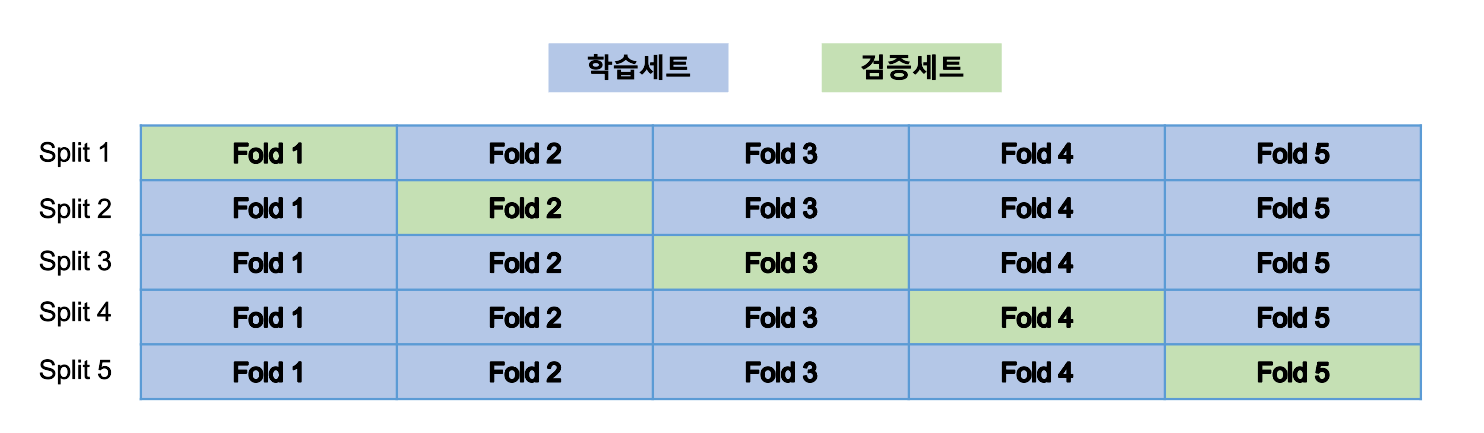

- 전체데이터를 k등분하고, 각 등분을 한번씩 검증데이터로 사용하여, 성능평가를 하고 각 폴드의 성능값들의 평균을 통해 검증하는 방법
- 일반적으로 5-fold, 10-fold 방식을 사용
- 학습데이터의 전체 부분을 검증 할 수 있음
- K번의 학습과 검증이 진행되므로 각 검증점수의 평균을 검증결과로 사용
- KFold 클래스의 주요 파라미터
    - n_splits: K값
    - shuffle: 셔플 여부(기본값 False)  
    - random_state: 시드값  


In [38]:
from sklearn.model_selection import KFold

In [39]:
cv = KFold(n_splits=5)
gen = cv.split(train_ft) # 제너레이터 반환
gen

<generator object _BaseKFold.split at 0x0000020E13C713F0>

In [40]:
type(gen)

generator

In [41]:
next(gen) # 튜플에 학습용 인덱스의 배열과 검증용 인덱스 배열이 담겨서 반환

(array([ 3910,  3911,  3912, ..., 19545, 19546, 19547]),
 array([   0,    1,    2, ..., 3907, 3908, 3909]))

In [42]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
for tri, vai in cv.split(train_ft):
    print(len(tri), len(vai))

15638 3910
15638 3910
15638 3910
15639 3909
15639 3909


In [44]:
scores = []
for tri, vai in cv.split(train_ft):
    # 학습용 데이터
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    # 검증용 데이터
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = DecisionTreeClassifier(max_depth=10, random_state=42) # 학습 가능한 모델 객체 생성
    model.fit(x_train, y_train) # 학습
    pred = model.predict_proba(x_valid)[:,1] # auc 평가를 위해 1에 대한 확률값으로 예측
    score = roc_auc_score(y_valid, pred)
    scores.append(score)

In [45]:
np.mean(scores)

np.float64(0.8640596415573348)

# Stratified K-Fold 방식 교차검증
- 타겟의 클래스 비율을 유지하며 k개의 세트로 분리하는 방식

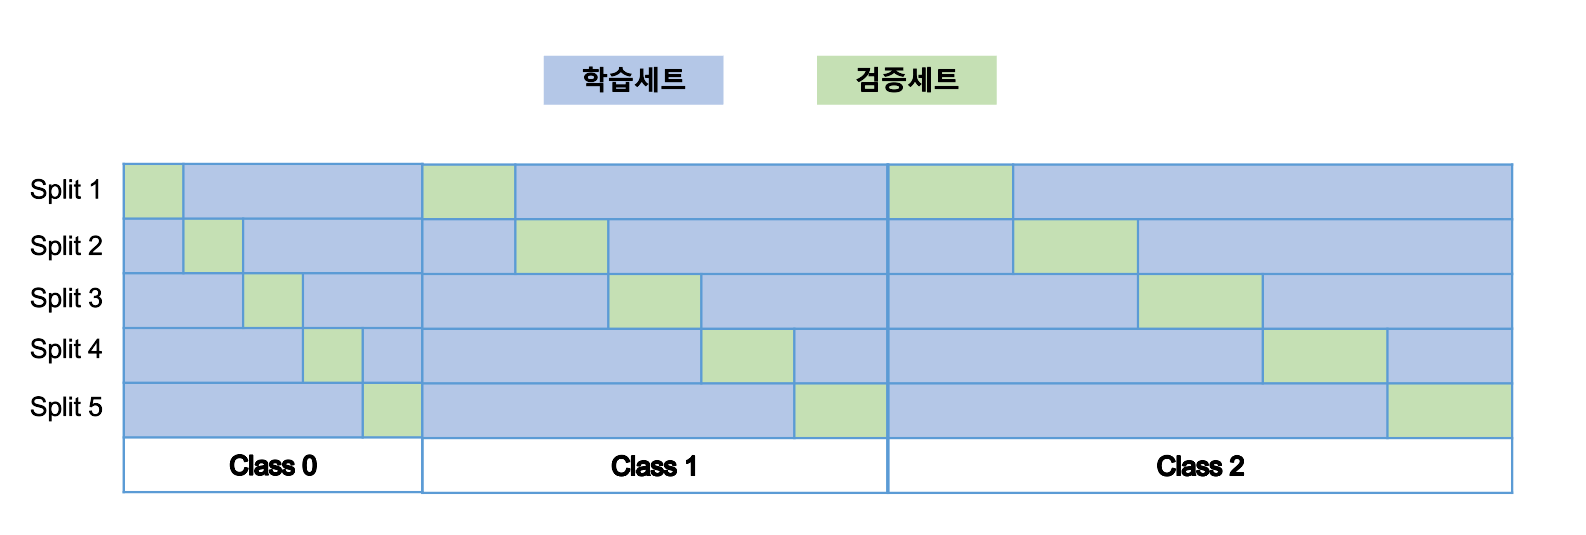

In [46]:
for tri, vai in cv.split(train_ft): # K-Fold
    y_train, y_valid = target.iloc[tri], target.iloc[vai]
    print(y_train.mean(), y_valid.mean())

0.2181225220616447 0.2184143222506394
0.21786673487658267 0.21943734015345268
0.2179946284691137 0.21892583120204603
0.21881194449773003 0.21565617805065235
0.21810857471705353 0.21847019698132514


In [47]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for tri, vai in cv.split(train_ft, target): # Stratified K-Fold
    y_train, y_valid = target.iloc[tri], target.iloc[vai]
    print(y_train.mean(), y_valid.mean())

0.2181864688579102 0.21815856777493606
0.2181864688579102 0.21815856777493606
0.2181864688579102 0.21815856777493606
0.21817251742438776 0.21821437707853672
0.21817251742438776 0.21821437707853672


In [48]:
# from sklearn.model_selection import StratifiedKFold

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for tri, vai in cv.split(train_ft, train["주택소유상태"]): # Stratified K-Fold
#     y_train, y_valid = target.iloc[tri], target.iloc[vai]
#     print(y_train.mean(), y_valid.mean())

In [49]:
scores = []
for tri, vai in cv.split(train_ft, target):
    # 학습용 데이터
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    # 검증용 데이터
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = DecisionTreeClassifier(max_depth=10, random_state=42) # 학습 가능한 모델 객체 생성
    model.fit(x_train, y_train) # 학습
    pred = model.predict_proba(x_valid)[:,1] # auc 평가를 위해 1에 대한 확률값으로 예측
    score = roc_auc_score(y_valid, pred)
    scores.append(score)

In [50]:
np.mean(scores)

np.float64(0.8669101783922077)

# cross_val_score 함수를 이용한 교차검증
- 주요파라미터
    - 첫 번째 인수로 모델 객체 전달
    - 두 번째 인수로 x값(학습용 입력데이터) 전달
    - 세 번째 인수로 y값(학습용 정답데이터) 전달
    - scoring 파라미터
        - 평가지표를 문자열로 전달
        - https://scikit-learn.org/1.5/modules/model_evaluation.html
    - cv 파라미터
        - cv 객체 또는 정수(k값)
    - n_jobs 파라미터
        - 멀티프로세싱
        - `-1` 전달할 경우 모든 코어 활용

In [51]:
from sklearn.model_selection import cross_val_score

- cv 파라미터에 정수값을 전달할 경우 정수값이 k값이 된다.
    - 분류에서는 StratifiedKFold 가 사용되고, 회귀에서는 KFold 가 사용된다.
    - shuffle 옵션은 없음

In [52]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_val_score(model, train_ft, target, scoring="roc_auc", cv=5, n_jobs=-1)

In [53]:
scores

array([0.8733612 , 0.85333164, 0.87034255, 0.86480941, 0.87623141])

In [54]:
scores.mean()

np.float64(0.8676152406979911)

In [55]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_val_score(model, train_ft, target, scoring="roc_auc", cv=cv, n_jobs=-1)
scores

array([0.85936568, 0.8541573 , 0.8672982 , 0.8729254 , 0.88080431])

In [56]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_val_score(model, train_ft, target, scoring="neg_log_loss", cv=cv, n_jobs=-1)
scores

array([-1.01834148, -0.93938048, -0.85825854, -0.88610196, -0.82089877])

In [57]:
-scores.mean()

np.float64(0.9045962472516962)

## 테스트 데이터에 대하여 예측 후 평가

In [58]:
model.fit(train_ft, target)
model.predict_proba(test_ft)[:,1]

array([0.1166786 , 0.07827476, 0.1166786 , ..., 0.        , 0.05025997,
       0.02941176])